## Part 1 - Adult Data Set ##

### First, we will load all the necessary packages ###

In [5]:
#load necessary packages 
import pandas as pd
import numpy as np
from scipy import optimize
import scipy as sc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #for plots
%matplotlib inline
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score 
import statsmodels.api as sm
import seaborn as sns

## Load the Adult Data Set

The dataset consists of 14 variables 

In [ ]:
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url_data, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])
data.head()

Note: The ouput is not displayed on this jupyter notebook as the UCI server was down today. (05-05-21)

**Explorartory Data Analysis**

In [6]:
data.shape

(32561, 15)

The data has 32561 rows and 15 columns 

In [7]:
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Out of our 32561 observations, 24720 earn below 50k and 7841 earn above 50k

In [50]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

This gives us the datatype for each variable. There are 9 objects and 6 integer columns 

**Age wise distribution**

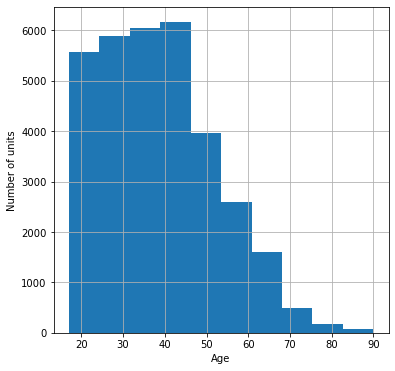

In [45]:
data['age'].hist(figsize = (6,6))
plt.xlabel('Age')
plt.ylabel('Number of units')
plt.show;

By observation age attribute is right-skewed and not symetric. min and max age in btw 17 to 90. Most people have ages between 20 and 50

**Hours per week distribution**

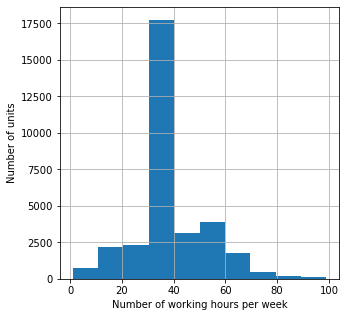

In [46]:
data['hours_per_week'].hist(figsize=(5,5))
plt.xlabel('Number of working hours per week')
plt.ylabel('Number of units')
plt.show()

**Marital Status Distribution**

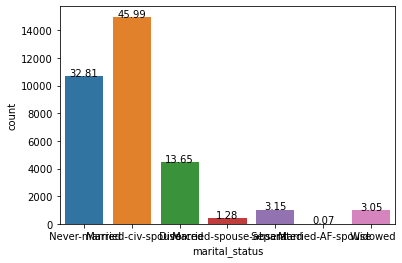

In [60]:
import seaborn as sns
total = float(len(data))
ax= sns.countplot(x="marital_status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Over 45% of people are married 

**Distribution of Gender**

<AxesSubplot:xlabel='sex', ylabel='count'>

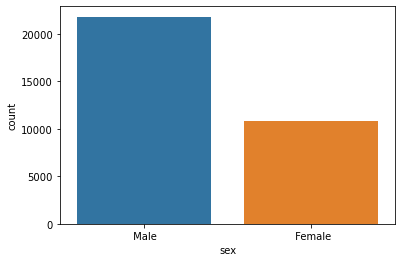

In [63]:
sns.countplot(x='sex', data=data)

**Distribution of races**

<AxesSubplot:xlabel='race', ylabel='count'>

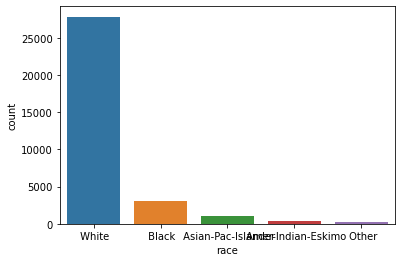

In [64]:
sns.countplot(x='race', data=data)

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

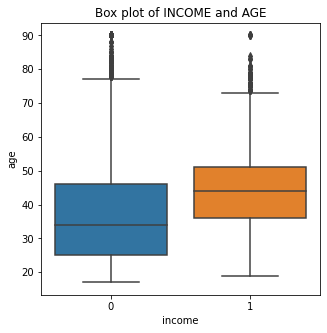

In [61]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=data).set_title('Box plot of INCOME and AGE')

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year)

<AxesSubplot:xlabel='income', ylabel='count'>

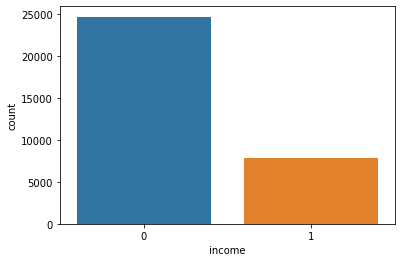

In [22]:
sns.countplot(x='income',data=data)

**Data Cleaning**

Converting all categorical variables to factors

In [6]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['income']=LE.fit_transform(data['income'])
data['workclass']=LE.fit_transform(data['workclass'])
data['education']=LE.fit_transform(data['education'])
data['marital_status']=LE.fit_transform(data['marital_status'])
data['occupation']=LE.fit_transform(data['occupation'])
data['relationship']=LE.fit_transform(data['relationship'])
data['race']=LE.fit_transform(data['race'])
data['sex']=LE.fit_transform(data['sex'])
data['native_country']=LE.fit_transform(data['native_country'])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [67]:
data.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int64
dtype: object

Now, we can see that all columns have integer values 

Drop null values 

In [9]:
data.dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


**Train-Test Split** 

In [10]:
# define data and create train test splits
n = len(data['income'])
data['x0'] = np.ones(n)
predictors = ['x0','age','workclass','fnlwgt','education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
target = ['income']
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target],
                        test_size=0.3, random_state=1)
n,p = X_train.shape

In [ ]:
X_train.shape

In [11]:
y_train.shape
#print('Original dataset shape %s' % Counter(y_train))

(22792, 1)

**Running Bayesian Logistic Regression on this data**

In [69]:
def sigma(x,beta):
    xbeta = x.dot(beta)
    d = 1. + np.exp(-xbeta)
    return d**(-1)
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+ (1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t
def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T.dot(S0).dot(beta-m0)
    return  nll(beta, x, y) -  logprior
def neg_post_prime(beta, x, y, m0, S0):
    return  x.T.dot(sigma(x,beta)-y)+S0.dot(beta-m0)
def laplace_prec(beta, x, S0):
    n = x.shape[0]  
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    prec = S0.values + x.T.dot(S.dot(x))    
    return prec
def NewtonRaphsonBayesLogReg(beta0,x,y,m0,S0,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log Posterior ',NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        H_inv = sc.linalg.inv(H) 
        beta = beta - H_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new-NegLogPost)
        NegLogPost = NegLogPost_new
    if (iter == maxiter):
        print('Did not Converge') 
    return beta, H_inv

In [70]:
predictors = ['x0','age','workclass','fnlwgt','education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
Xt = X_train[predictors]
n,p = Xt.shape
m0 = np.zeros(p)
S0 = Xt.T.dot(Xt)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train['income'],
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  15798.210539322303  AbDiff  1
iteration  2  Negative Log Posterior  10008.49192898758  AbDiff  5789.718610334723
iteration  3  Negative Log Posterior  9152.08144743129  AbDiff  856.4104815562896
iteration  4  Negative Log Posterior  8892.402312633541  AbDiff  259.6791347977487
iteration  5  Negative Log Posterior  8860.13740181454  AbDiff  32.26491081900167
iteration  6  Negative Log Posterior  8859.158341146658  AbDiff  0.9790606678816403
iteration  7  Negative Log Posterior  8859.157077989938  AbDiff  0.0012631567205971805
[-8.34892370e+00  3.36971924e-02 -8.30117772e-03  5.65312707e-07
  1.75219433e-02  3.24758403e-01 -2.36009960e-01  6.80411271e-03
 -1.10248815e-01  1.20995086e-01  8.80466045e-01  3.18737575e-04
  6.81595409e-04  3.06354020e-02  3.14278675e-03]


Thus, after 7 iterations, we obtain the coefficients for the intercept and 14 regressors. The list of numbers at the bottom of the iterations give these coefficients 

We will also compute 95% confidence intervals by using the Hessian which is the inverse of the MLE covariance. We will present the results via a pandas data frame

In [71]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['intercept','age','workclass','fnlwgt','education','education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
results = pd.DataFrame(results,columns = col,index=ind)
results

,post mean,post se,lower 95% bound,upper 95% bound
intercept,-8.348924e+00,2.248276e-01,-8.789586e+00,-7.908262e+00
age,3.369719e-02,1.607290e-03,3.054690e-02,3.684748e-02
workclass,-8.301178e-03,1.329937e-02,-3.436794e-02,1.776558e-02
fnlwgt,5.653127e-07,1.796002e-07,2.132964e-07,9.173290e-07
education,1.752194e-02,6.138299e-03,5.490877e-03,2.955301e-02
education_num,3.247584e-01,8.533931e-03,3.080319e-01,3.414849e-01
marital_status,-2.360100e-01,1.449573e-02,-2.644216e-01,-2.075983e-01
occupation,6.804113e-03,4.603834e-03,-2.219402e-03,1.582763e-02
relationship,-1.102488e-01,1.689820e-02,-1.433693e-01,-7.712834e-02
race,1.209951e-01,2.518672e-02,7.162912e-02,1.703611e-01


Significant variables are intercept, age, fnlwgt, education, education_num, marital_status, relationship, race, sex, capital_gain, capital_loss, hours_per_week. Thus, these variables are good determinants of the income class of any individual in the dataset. Work class, Occupation and Native Country do not determine whether a person will earn more or less than $50k.

We want to check if these results that we obtain using the Bayesian method are similar to the classical logistical regession method. We check this by fitting the same data uisng the sm.Logit() function as below 

In [72]:
Xt = X_train[predictors]
yt= y_train['income']
model = sm.Logit(yt, Xt).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.388458
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22777
Method:                           MLE   Df Model:                           14
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.3046
Time:                        12:09:45   Log-Likelihood:                -8853.7
converged:                       True   LL-Null:                       -12733.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
x0                -8.3611      0.225    -37.140      0.000      -8.802      -7.920
age                0.0337      0.002     20.967      0.000       0.031       0.037
workclass         -0.0083      0.013     -0.624      0.533      -0.034       0.018
fnlwgt          5.662e-07    1.8e-07      3.150      0.002    2.14e-07    9.18e-07
education          0.0176      0.006      2.867      0.004       0.006       0.030
education_num      0.3252      0.009     38.062      0.000       0.308       0.342
marital_status    -0.2364      0.015    -16.291      0.000      -0.265      -0.208
occupation         0.0068      0.005      1.478      0.139      -0.002       0.016
relationship      -0.1104      0.017     -6.527      0.000      -0.144      -0.077
race               0.1212      0.025      4.807      0.000       0.072       0.171
sex                0.8819      0.060     14.747      0.000       0.765       0.999
capital_gain       0.0003   1.17e-05     27.541      0.000       0.000       0.000
capital_loss       0.0007   3.99e-05     17.086      0.000       0.001       0.001
hours_per_week     0.0307      0.002     18.510      0.000       0.027       0.034
native_country     0.0032      0.003      1.250      0.211      -0.002       0.008
==================================================================================
"""

As we can observe from the above table, the estimated coefficients and p value and 95% confidence intervals using both methods are nearly the same.   

**Evaluating Performance**

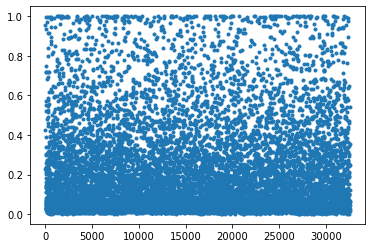

In [113]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')

0.8307912785341386 income    3631.203088
dtype: float64 0.8564835302579469


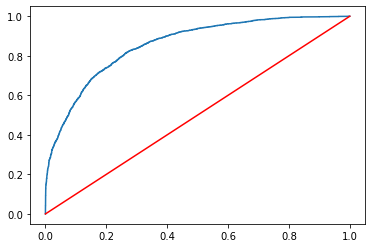

In [112]:
#Evaluate predictive performance of Bayesian Logistic Regression

pred_class_blr = (pred_probs_blr > .5)

AccRate = np.sum(pred_class_blr==y_test['income'])/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)

In [ ]:
The above AUC curve shows that our Bayesian Logistic regression model obtains an accuracy level of 83.0791%. 

Now that we've determined the major determinants of income class, let us go ahead and understand how Age and Working Hours per week can affect income. As seen in the previous section, these two are significant variables in the Bayesian Logistic regression, meaning they are imporant determinants of income. We use cluster analysis to analyse the different clusters of income based on age and hours worked per week. Do people of a certain age earn more than others? Do people who work longer hours generally have higher pay? Let's find out!  

## Cluster Analysis ##

In [7]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

**Gaussian Mixture Models**

We first define the variables of interest as 'age' and 'hours_per_week'. We then fit the Gaussian mixture model on these variables using the E-M algorithm

In [38]:
#vars = ['age','workclass','fnlwgt','education','education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
vars=['age','hours_per_week']
gmm = GaussianMixture(n_components=2)
gmm.fit(data[vars])
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[48.75928675 42.80637245]
 [29.20480623 38.25493091]]


[[[129.53279952 -57.4828995 ]
  [-57.4828995  193.74152851]]

 [[ 54.771982    32.53030069]
  [ 32.53030069 104.48203475]]]


The first list gives us the mean age and working hours for each cluster. For eg: the mean age and number of working hours for cluster 1 is 48.75241939 and 42.82081458 respectively. Similarly, the second row gives the mean age and working hours for the second cluster. The next list gives us the covariances for age and working hours for each cluster. For eg: 131.11104152 is the variance of age for cluster 1, 195.19819879 is the variance of hours_per_week for cluster 1 and -58.19848967 is the covariance of age and hours_per_week for cluster 1. 

**Soft Allocation to Clusters**

The GMM method does not neccessarily allocate individuals to each cluster with certainty, it allocates them with some probabilities. 

Adding the probabilities can give us an idea of how many individuals each cluster has. 

In [15]:
probs = gmm.predict_proba(data[vars])
print(np.sum(probs,axis=0))
print(probs[22650:22700].round(3))

[15566.50163679 16994.49836321]
[[1.    0.   ]
 [1.    0.   ]
 [0.101 0.899]
 [0.389 0.611]
 [0.101 0.899]
 [0.323 0.677]
 [0.786 0.214]
 [0.982 0.018]
 [1.    0.   ]
 [0.008 0.992]
 [0.024 0.976]
 [0.125 0.875]
 [0.993 0.007]
 [0.091 0.909]
 [0.007 0.993]
 [0.462 0.538]
 [0.003 0.997]
 [0.656 0.344]
 [0.499 0.501]
 [0.219 0.781]
 [0.035 0.965]
 [0.36  0.64 ]
 [0.973 0.027]
 [0.001 0.999]
 [0.043 0.957]
 [0.993 0.007]
 [0.984 0.016]
 [0.463 0.537]
 [0.085 0.915]
 [0.943 0.057]
 [0.179 0.821]
 [0.994 0.006]
 [0.947 0.053]
 [0.999 0.001]
 [0.996 0.004]
 [1.    0.   ]
 [0.143 0.857]
 [0.001 0.999]
 [0.959 0.041]
 [0.041 0.959]
 [0.005 0.995]
 [0.959 0.041]
 [0.878 0.122]
 [0.938 0.062]
 [0.219 0.781]
 [0.122 0.878]
 [0.166 0.834]
 [0.988 0.012]
 [0.004 0.996]
 [0.696 0.304]]


This method gives the probability of each data point belonging to either cluster. Here, we are displaying the probabilities for data points between 22650 and 22700. The probability that the 22650th point belongs to cluster 1 is 1 and belonging to cluster 2 is 0. Similarly, the probability that the 22650th point belongs to cluster 1 is 1 and belonging to cluster 2 is 0. The probability that the 22652th term belongs to cluster 1 is 0.101 and belonging to cluster 2 is 0.899. Thus, there is a higher chance that the 22652th data point belongs to the second cluster.    

**Model Search** 

We need to fit models with different numbers of cluster and different type of covariance matrices to identify the best one. This is done via the BIC (the smaller the better in this case)

Types of covariance matrices:

spherical: each cluster k has covariance  𝜎2𝑘𝐼 

tied: full covariance matrix but the same across clusters

diag: diagonal covariance matrix, different for each cluster

full: full covariance matrix, different for each cluster

In [94]:
lowest_bic = np.infty

#Consider k=1,2 and four types of covariance matrix
n_components_range = range(1, 3)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(n_components_range),len(cv_types))) #matrix to store the BICs
j = -1
for cv_type in cv_types:
    j = j+1
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data[vars])
        bicij = gmm.bic(data[vars])  #get the BIC 
        bic[n_components-1,j] = bicij
        #the code below keeps track of the model with the lowest BIC
        if bicij < lowest_bic:
            lowest_bic = bicij
            best_gmm = gmm
print(lowest_bic)
print(best_gmm.means_)
print('\n')
print(best_gmm.covariances_)
bic = pd.DataFrame(bic,columns = cv_types,index=n_components_range)
bic

510817.0201718488
[[48.76221716 42.80678771]
 [29.2073874  38.25577738]]


[[[129.52776682 -57.50426665]
  [-57.50426665 193.77730296]]

 [[ 54.79449531  32.5299406 ]
  [ 32.5299406  104.47530422]]]


,spherical,tied,diag,full
1,519006.853761,518550.926917,518694.828187,518550.926917
2,512975.572369,515747.222959,515179.576939,510817.020172


510817.020172 is the lowest BIC out of all iterations. Looking at the table above, this value is achieved at k=2 and covariance type='full', thus we will use this to fit our Bayesian Gaussian Mixture Model. 

The first list is the mean of age and hours_per_week for each cluster. The second list gives us the covariances for age and hours_per_week for each cluster. 

In [10]:
n_components_range = range(1, 3)
vars=['age','hours_per_week']
Bgmm = BayesianGaussianMixture(n_components=2,covariance_type='full',
                               weight_concentration_prior=0.0001, max_iter = 200)
Bgmm.fit(data[vars])
probs = Bgmm.predict_proba(data[vars])
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=n_components_range)
results

,# of individuals
1,16754.0
2,15807.0


The table shows that 15807 observations belong to cluster 2 while 16754 observations belong to cluster 1. 

Text(0, 0.5, 'Number of working hours')

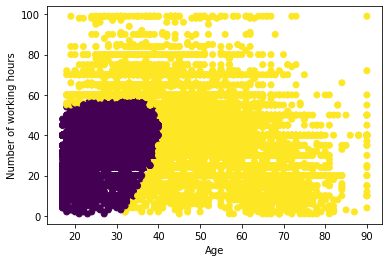

In [11]:
vs=['age','hours_per_week']
Bgmm.fit(data[vs])
labels = Bgmm.predict(data[vs])
plt.scatter(data['age'], data['hours_per_week'], c=labels)
plt.xlabel("Age")
plt.ylabel("Number of working hours")

Plotting the fitted Bayesian Gaussian Mixture, we get the scatter plot as above. This scatter plot shows that there are two clusters of incomes. Young people (uptil age 40) who work the lesser number of hours (upto 60 hours) fall into the low income class. Some individuals between ages 30 and 40 can belong to higher income groups despite working lower hours while some can belong to low income groups despite working long hours. After age 40, irrespective of the number of hours a person works, they would belong to a higher income class.  

**K Means Clustering**

Let us also use the KMeans Clustering Algorithm to find the different clusters in the data. We will first try to find the number of clusters we should use. This is obtained using the ELBO method. In this method, we first find the sum of squared errors (SSE) for different number of clusters and then choose the k from which the SSE begins to fall. If we consider the line that we obtain on the cluster-SSE graph as an arm, then this point is the elbow of that arm. 

In [69]:
from sklearn.cluster import KMeans

In [70]:
k_range=range(1,6)
sse=[]
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(data[['age', 'hours_per_week']])
    sse.append(km.inertia_)

In [71]:
sse

[11022224.070943978,
 6846995.190536474,
 4922621.442735942,
 3712239.6285479795,
 2853523.099553647]

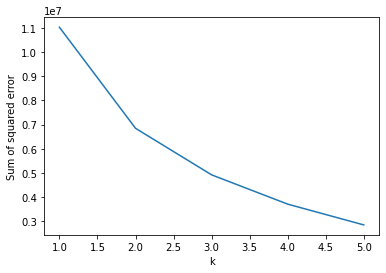

In [72]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

Plotting the SSE for different k values shows that the 'elbow' point is at k=2. Thus, we should use 2 clusters. 

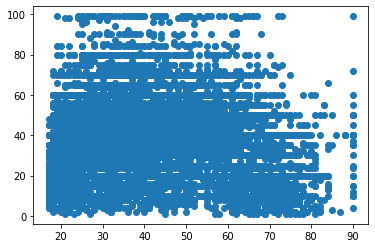

In [63]:
plt.scatter(data['age'], data['hours_per_week'])

We create fit a KMeans cluster with 2 clusters 

In [64]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

We find the centers for each of those clusters. 

In [66]:
km.cluster_centers_

array([[51.49713508, 42.4379745 ],
       [28.88617668, 38.93569547]])

The first cluster is centered at age=51.49 and hours_per_week=42.43 and the second cluster is centered at age=28.88 and hours_per_week=38.93

In [65]:
y_pred= km.fit_predict(data[['age', 'hours_per_week']])
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
We run KMeans algorithm on Age and Income and computes the cluster for each data point. 

In [67]:
data['cluster']=y_pred
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cluster
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,1


We add a column 'cluster' to our dataframe to associate each data point with the cluster assigned to it 

In [ ]:
Finally, we plot age and hours_per_week, giving a different colour to points belonging to different clusters

No handles with labels found to put in legend.


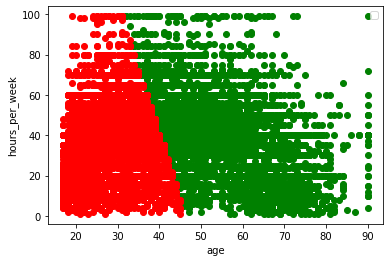

In [68]:
df1= data[data.cluster==0]
df2= data[data.cluster==1]
plt.scatter(df1.age,df1['hours_per_week'],color='green')
plt.scatter(df2.age,df2['hours_per_week'],color='red')
#plt.scatter(km.cluster_centers_[:0], km.cluster_centers_[:1], color='purple', marker='*', label='centroid')
plt.xlabel('age')
plt.ylabel('hours_per_week')
plt.legend()

This plot shows that the first cluster of incomes is associated with lower age. People of lower ages tend to belong to low income class irrespective of the number of hours they work. This, however, changes around age 35, when people who put more number of hours per week belong to higher income level. By age 45, people can expect to be in higher income levels with even lower number of working hours. 

## Part 2 - Bike Sharing Data ##

First, we will load the dataset into a table df

In [3]:
df=pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Exploratory Data Analysis**

***Temperature*** 

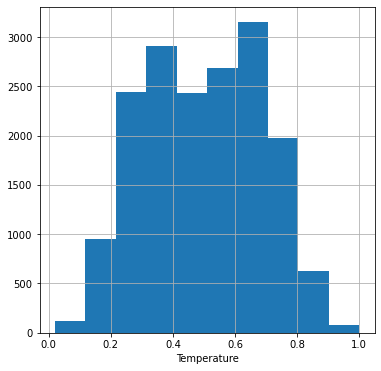

In [4]:
df['temp'].hist(figsize = (6,6))
plt.xlabel('Temperature')
plt.show;

In [37]:
df['temp'].mean()

0.4969871684216586

The average normalised temperature is 0.496 and majority of normalised temperatures vary between 0.2 and 0.8

***Actual Temperature***

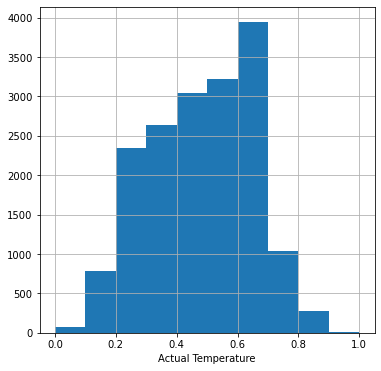

In [5]:
df['atemp'].hist(figsize = (6,6))
plt.xlabel('Actual Temperature')
plt.show;

In [38]:
df['atemp'].mean()

0.4757751021347581

The average actual temperature is 0.47577 and majority of actual temperatures vary between 0.2 and 0.7

***Humidity***

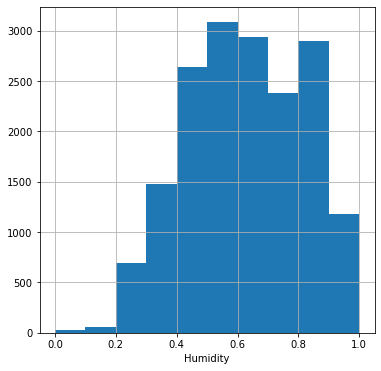

In [6]:
df['hum'].hist(figsize = (6,6))
plt.xlabel('Humidity')
plt.show;

In [39]:
df['hum'].mean()

0.6272288394038822

The mean average normalised temperature is 0.62722 and majority of normalised temperatures vary between 0.4 and 0.9

***Weather Situation***

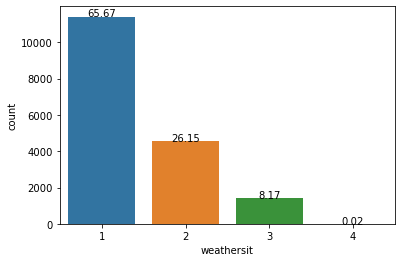

In [30]:
import seaborn as sns
total = float(len(df))
ax= sns.countplot(x="weathersit", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Most of the time, the weather situation was 1 ie. Clear, Few clouds, Partly cloudy, Partly cloudy, this was followed by 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and 3( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and very less number of times the weather was Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

***Windspeed***

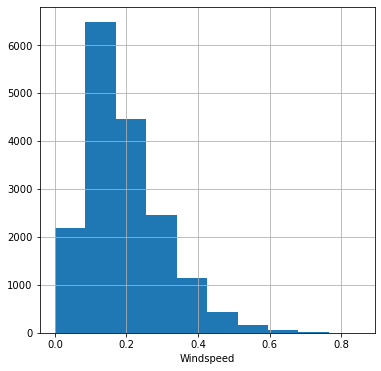

In [7]:
df['windspeed'].hist(figsize = (6,6))
plt.xlabel('Windspeed')
plt.show;

In [40]:
df['windspeed'].mean()

0.1900976063064631

The mean windspeed is 0.19 and most of time the windspeed ranges between 0.1 and 0.3

***Season***

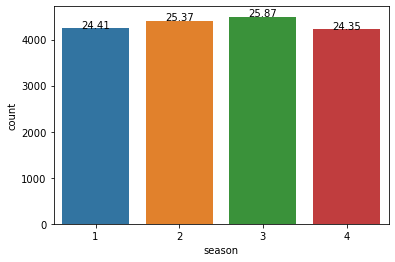

In [33]:
import seaborn as sns
total = float(len(df))
ax= sns.countplot(x="season", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Observations include all seasons almost equally. There is no imbalance in seasons. 

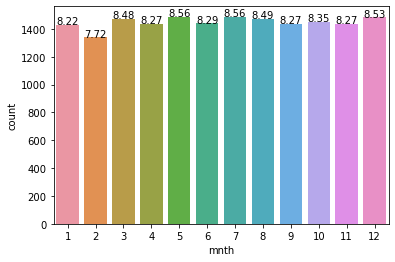

In [34]:
import seaborn as sns
total = float(len(df))
ax= sns.countplot(x="mnth", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Observations include all months almost equally. There is no imbalance in months. 

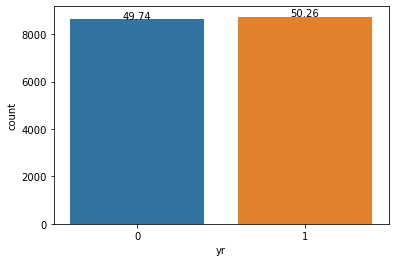

In [36]:
import seaborn as sns
total = float(len(df))
ax= sns.countplot(x="yr", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are almost equal number of observations for 2011 and 2012

We will then load all necessary packages and define the predictors and target variable before making a 70-30 train-test split

In [5]:
from sklearn import linear_model # A very popular Python library for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split #needed to for assessing prediction
from sklearn import datasets ## imports datasets from scikit-learn

p=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = df[p]
Y = df['cnt']
# Split up your data
trainX, testX, trainy, testy = train_test_split(X,Y,
                                                test_size=0.3, random_state=1)
trainy

16408    172
6968     108
9080      86
5385     308
11361    114
        ... 
10955    537
17289     51
5192     101
12172    270
235        3
Name: cnt, Length: 12165, dtype: int64

**Ridge Regression**
Now, we perform ridge regression on this data where the regularisation parameter is e^-8

In [24]:
npower = 11
predictors = ['x']
predictors.extend(['x%d'%i for i in range(2,npower+1)])

#Step 1
lam=np.exp(-8)
ridgereg = Ridge(alpha=lam,normalize=False,fit_intercept=True)
ridgereg.fit(trainX,trainy)

#Step 2
y_pred_train = ridgereg.predict(trainX)
train_mse = np.mean((y_pred_train-trainy)**2)

#Steps 3 and 4
y_pred_test = ridgereg.predict(testX)
test_mse = np.mean((y_pred_test-testy)**2)

#output to return
results = [train_mse,test_mse]
results.extend([ridgereg.intercept_])
results.extend(ridgereg.coef_)
col = ['trainMSE','testMSE','intercept', 'season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
results = pd.DataFrame([results],columns = col)
results

,trainMSE,testMSE,intercept,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,19791.254167,20863.797299,-23.917056,18.168375,78.442576,0.315372,7.636493,-25.734235,1.70338,3.692553,-2.8246,30.977066,285.649533,-199.27332,42.430897


**Linear Regression**
We compare this result with linear regression to see which type of regression performs better in this case. 

In [15]:
# Step 1

linreg = LinearRegression(fit_intercept=True,normalize=False)
linreg.fit(trainX,trainy)

# Step 2
y_pred_train = linreg.predict(trainX)
train_mse = np.mean((y_pred_train-trainy)**2)

# Steps 3 and 4
y_pred_test = linreg.predict(testX)
test_mse = np.mean((y_pred_test-testy)**2)

# output to return
results = [train_mse,test_mse]
results.extend([linreg.intercept_])
results.extend(linreg.coef_)
col = ['trainMSE','testMSE','intercept', 'season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
results = pd.DataFrame([results],columns = col)
results

,trainMSE,testMSE,intercept,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,19791.254167,20863.799909,-23.917465,18.168362,78.44258,0.315375,7.636489,-25.734198,1.703385,3.692558,-2.82455,30.967226,285.660759,-199.273627,42.43147


**Bayesian Linear Regression** 

Finally we perform the Bayesian Linear Regression using probability distributions rather than point estimates. The response, y, is not estimated as a single value, but is assumed to be drawn from a probability distribution. 

In [7]:
# function for Bayesian Linear regression, return posterior mean and 95% CIs
def BLR(X,y,mu_0,Om_0_inv,a_0,b_0,ind_names,N):
    col_names = ['posterior mean','lower 95% bound','upper 95% bound']
    n,p = X.shape
    XtX = X.T.dot(X)
    Om_n_inv = XtX + Om_0_inv
    Om_n = sc.linalg.inv(Om_n_inv)
    term1 = Om_0_inv.dot(mu_0)+X.T.dot(y)
    mu_n = Om_n.dot(term1)
    a_n = a_0 + n/2
    term2 = y.T.dot(y)+mu_0.dot(Om_0_inv.dot(mu_0))+mu_n.dot(Om_n_inv.dot(mu_n))
    b_n = b_0 + term2/2
    sigma2 = 1/np.random.gamma(a_n, 1/b_n, N)
    betas = np.zeros((N,p))
    # draw N samples from the marginal posterior of beta
    for i in range(0,N):
        s2 =sigma2[i]
        cov = s2*Om_n
        betas[i,] = np.random.multivariate_normal(mu_n,cov,1)

    #find the mean of each column which corresponds to each beta coefficient     
    mu_beta = np.mean(betas, axis=0)
    #find the 2.5 and 97.5 percentils which correspond to each beta coefficient 
    lower95 = np.percentile(betas,2.5,axis=0)
    upper95 = np.percentile(betas,97.5,axis=0)
    results = np.column_stack([mu_beta,lower95,upper95])
    results = pd.DataFrame(results,columns = col_names,index=ind_names)
    return results, mu_n, Om_n, a_n, b_n

In [8]:
n = df.shape[0]
df['x0']=np.ones(n)
predictors =['x0','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = df[predictors]
y = df['cnt']
n,p = X.shape

#set up prior parameters
mu_0 = np.zeros(p)
XtX = X.T.dot(X)
Om_0_inv = XtX/n #unit information prior
a_0 = 0.01
b_0 = 0.01

N=10000 #Monte Carlo sample size

results, mu_n, Om_n, a_n, b_n = BLR(X,y,mu_0,Om_0_inv,a_0,b_0,predictors,N)
results

,posterior mean,lower 95% bound,upper 95% bound
x0,-25.884636,-59.025955,6.977050
season,19.873645,11.204675,28.404067
yr,80.962079,70.693885,91.250425
mnth,-0.009827,-2.666338,2.697006
hr,7.668375,6.902386,8.442712
holiday,-21.986230,-53.524537,8.828116
weekday,1.893972,-0.733087,4.449759
workingday,3.860193,-7.760253,15.161761
weathersit,-3.343215,-12.344407,5.621989
temp,78.000901,-99.011790,251.746842


From the above table, we can conclude that season, yr, hr, atemp and hum are significant variables. Month, Holiday, weekday, working day, weather situation, temperature and windspeed do not have a significant contribution in determining the sale of bikes. The season, year, hour of the day, actual feel temperature and humidity are the major determinants of sales of bikes.

**Appendix**

I tried to treat the imbalance in data using the SMOTE method since imbalanced data could lead to different accuracy of prediction for each class Since there are more data points for the <$50k class, the prediction accuracy for this class will be higher and so our results will be skewed more towards class <=50k. . However, we want to achieve an equal prediction accuracy for both classes as we are interested in understanding both. Therefore, we use the SMOTE technique to synthetically over-sample the data and obtain equal number of observations for both classes. However, treating the imbalance in data using SMOTE technique required us to change the train-test split to 60-40 because at 30% test data, we will not be able to use the Newton Raphson Bayesian Logistic Regression functions because of the large size of the matrix. The overall prediction due to this new train-test split was much lower than the prediction accuracy obtained without using the SMOTE technique and hence, I have not used this method for the project. However, I am attaching the codes for this method for future work with smaller matrices.  

In [12]:
from imblearn.over_sampling import SMOTE

In [ ]:
Re-splitting the test and train data 

In [26]:
# define data and create train test splits
n = len(data['income'])
data['x0'] = np.ones(n)
predictors = ['x0','age','workclass','fnlwgt','education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
target = ['income']
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(data[predictors], data[target],
                        test_size=0.6, random_state=1)
n,p = X_train_re.shape

In [27]:
smote=SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_re.astype(float),y_train_re)

In [28]:
#y_train.shape
y_train_smote.shape
X_train_smote.shape

(19566, 15)

In [29]:
def sigma(x,beta):
    xbeta = x.dot(beta)
    d = 1. + np.exp(-xbeta)
    return d**(-1)
def nll(beta, x, y):
    t = y.T.dot(np.log(sigma(x,beta)))+ (1-y).T.dot(np.log(1.-sigma(x,beta)))
    return -t
def neg_post(beta, x, y, m0, S0):
    logprior =  - .5* (beta-m0).T.dot(S0).dot(beta-m0)
    return  nll(beta, x, y) -  logprior
def neg_post_prime(beta, x, y, m0, S0):
    return  x.T.dot(sigma(x,beta)-y)+S0.dot(beta-m0)
def laplace_prec(beta, x, S0):
    n = x.shape[0]  
    S = np.diag(sigma(x,beta)*(1-sigma(x,beta)))
    prec = S0.values + x.T.dot(S.dot(x))    
    return prec
def NewtonRaphsonBayesLogReg(beta0,x,y,m0,S0,maxiter,tolerance):
    i = 0
    beta = beta0
    NegLogPost = neg_post(beta, x, y, m0, S0)
    AbDiff = 1; #anything bigger than tolerance would do here
    while (AbDiff> tolerance) & (i<maxiter):
        i =i+1;
        print('iteration ',i,' Negative Log Posterior ',NegLogPost, ' AbDiff ', AbDiff)
        grad = neg_post_prime(beta, x, y, m0, S0)
        H = laplace_prec(beta, x, S0)
        H_inv = sc.linalg.inv(H) 
        beta = beta - H_inv.dot(grad)
        NegLogPost_new = neg_post(beta, x, y, m0, S0)
        AbDiff = np.abs(NegLogPost_new-NegLogPost)
        NegLogPost = NegLogPost_new
    if (iter == maxiter):
        print('Did not Converge') 
    return beta, H_inv

In [30]:
predictors = ['x0','age','workclass','fnlwgt','education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
Xt = X_train_smote[predictors]
n,p = Xt.shape
m0 = np.zeros(p)
S0 = Xt.T.dot(Xt)/n
beta0 = np.zeros(p)
tolerance = 1e-05
maxiter = 100 
beta_map, cov = NewtonRaphsonBayesLogReg(beta0,Xt, y_train_smote['income'],
                                                  m0,S0,maxiter,tolerance)
print(beta_map)

iteration  1  Negative Log Posterior  13562.117734835912  AbDiff  1
iteration  2  Negative Log Posterior  9919.493543061419  AbDiff  3642.6241917744937
iteration  3  Negative Log Posterior  9441.333471001491  AbDiff  478.1600720599272
iteration  4  Negative Log Posterior  9182.49139663514  AbDiff  258.8420743663519
iteration  5  Negative Log Posterior  9115.550717981105  AbDiff  66.94067865403485
iteration  6  Negative Log Posterior  9108.859221665185  AbDiff  6.691496315919721
iteration  7  Negative Log Posterior  9108.764468493564  AbDiff  0.09475317162105057
iteration  8  Negative Log Posterior  9108.764445393463  AbDiff  2.3100101316231303e-05
[-8.60831682e+00  4.32662650e-02 -1.12457588e-03  7.41770905e-07
  1.10977974e-02  3.72717144e-01 -2.94478951e-01  1.43650169e-02
 -5.89069218e-02  1.78672784e-01  9.96613509e-01  3.15713811e-04
  6.43132667e-04  3.73315609e-02  1.41278074e-03]


In [31]:
#95% credible intervals
se = np.sqrt(np.diag(cov))
lower95 = beta_map - 1.96*se
upper95 = beta_map + 1.96*se

#present the output via a pandas data frame
results = np.column_stack([beta_map,se,lower95,upper95])
col = ['post mean','post se','lower 95% bound','upper 95% bound']
ind = ['intercept','age','workclass','fnlwgt','education','education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
results = pd.DataFrame(results,columns = col,index=ind)
results

,post mean,post se,lower 95% bound,upper 95% bound
intercept,-8.608317e+00,2.349431e-01,-9.068805e+00,-8.147828
age,4.326627e-02,1.708588e-03,3.991743e-02,0.046615
workclass,-1.124576e-03,1.420379e-02,-2.896401e-02,0.026715
fnlwgt,7.417709e-07,1.754080e-07,3.979712e-07,0.000001
education,1.109780e-02,5.969966e-03,-6.033357e-04,0.022799
education_num,3.727171e-01,8.977567e-03,3.551211e-01,0.390313
marital_status,-2.944790e-01,1.509684e-02,-3.240688e-01,-0.264889
occupation,1.436502e-02,4.695691e-03,5.161462e-03,0.023569
relationship,-5.890692e-02,1.672997e-02,-9.169766e-02,-0.026116
race,1.786728e-01,2.516702e-02,1.293454e-01,0.228000


In [32]:
Xt = X_train_smote[predictors]
yt= y_train_smote['income']
model = sm.Logit(yt, Xt).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.465181
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                19566
Model:                          Logit   Df Residuals:                    19551
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Apr 2021   Pseudo R-squ.:                  0.3289
Time:                        16:11:35   Log-Likelihood:                -9101.7
converged:                       True   LL-Null:                       -13562.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
x0                -8.6245      0.235    -36.652      0.000      -9.086      -8.163
age                0.0433      0.002     25.324      0.000       0.040       0.047
workclass         -0.0011      0.014     -0.077      0.938      -0.029       0.027
fnlwgt          7.438e-07   1.76e-07      4.236      0.000       4e-07    1.09e-06
education          0.0112      0.006      1.875      0.061      -0.001       0.023
education_num      0.3733      0.009     41.522      0.000       0.356       0.391
marital_status    -0.2947      0.015    -19.503      0.000      -0.324      -0.265
occupation         0.0144      0.005      3.069      0.002       0.005       0.024
relationship      -0.0589      0.017     -3.518      0.000      -0.092      -0.026
race               0.1791      0.025      7.108      0.000       0.130       0.229
sex                0.9979      0.062     16.063      0.000       0.876       1.120
capital_gain       0.0003   1.35e-05     23.818      0.000       0.000       0.000
capital_loss       0.0006   4.53e-05     14.227      0.000       0.001       0.001
hours_per_week     0.0374      0.002     20.322      0.000       0.034       0.041
native_country     0.0014      0.003      0.542      0.588      -0.004       0.007
==================================================================================
"""

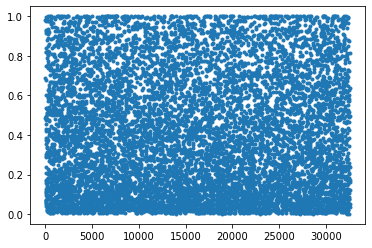

In [33]:
#Calculate the prediction probabilities with Bayesian Logistic regression

N = 10000 #number of Monte Carlo samples
# draw N samples from the approximate posterior (Laplace) of beta
betas = np.random.multivariate_normal(beta_map,cov,N)
Xbetas = X_test[predictors].dot(betas.T)
#apply sigmoid
d = 1/(1. + np.exp(-Xbetas))
pred_probs_blr = np.mean(d, axis=1)
plt.plot(pred_probs_blr,'.')

0.7659944723103695 income    4660.147914
dtype: float64 0.856072928262537


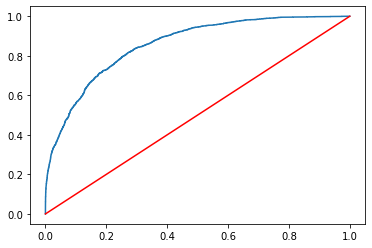

In [34]:
#Evaluate predictive performance of Bayesian Logistic Regression

pred_class_blr = (pred_probs_blr > .5)

AccRate = np.sum(pred_class_blr==y_test['income'])/len(y_test) 
LS = -(y_test.T.dot(np.log(pred_probs_blr))+(1-y_test).T.dot(np.log(1-pred_probs_blr)))

fpr,tpr,thresholds = roc_curve(y_test,pred_probs_blr)
xgrid = np.linspace(0,1,100) 
plt.plot(fpr,tpr)
plt.plot(xgrid,xgrid,'red')
AUC = roc_auc_score(y_test,pred_probs_blr)
print(AccRate, LS, AUC)